# Projects In Machine Learning  INFO8665 

# Group 7 
- Prashansa Rathod - 8993410
- Harsh Joshi – 8952840
- Jaiv Burman - 8930180
- Nidhi Ahir – 9041129
- Nil Kumar Patel - 8983991

# Exploratory Data Analysis 

'Training Data Overview:'

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


'Missing Values:'

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

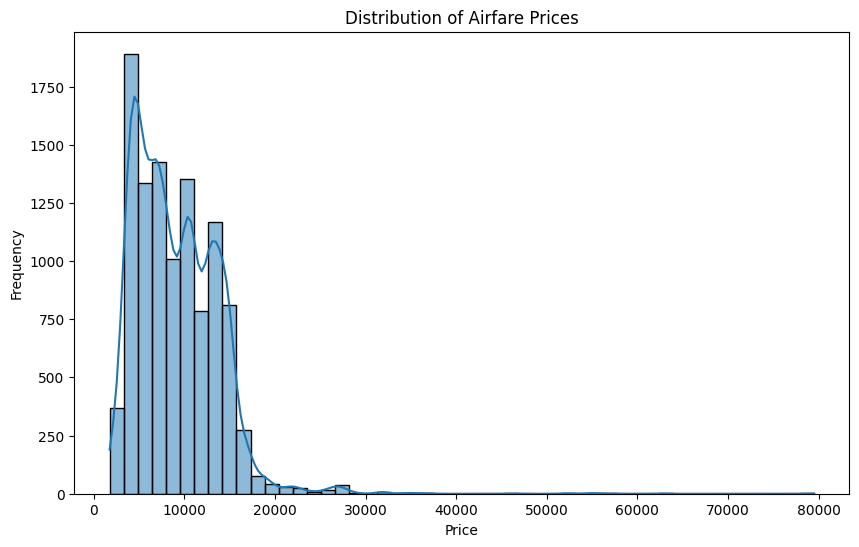

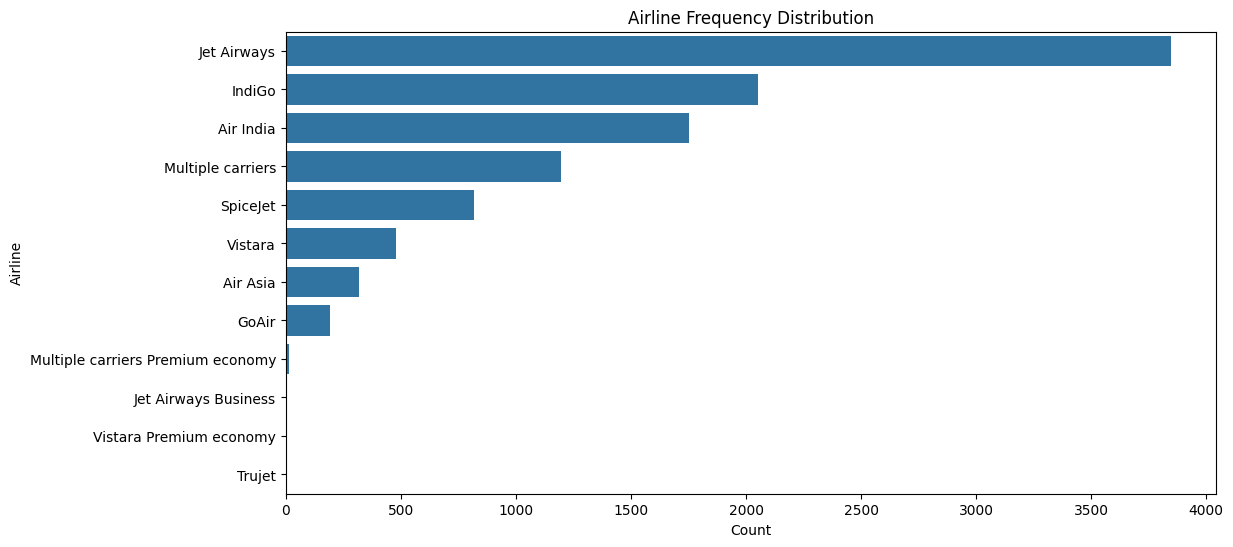

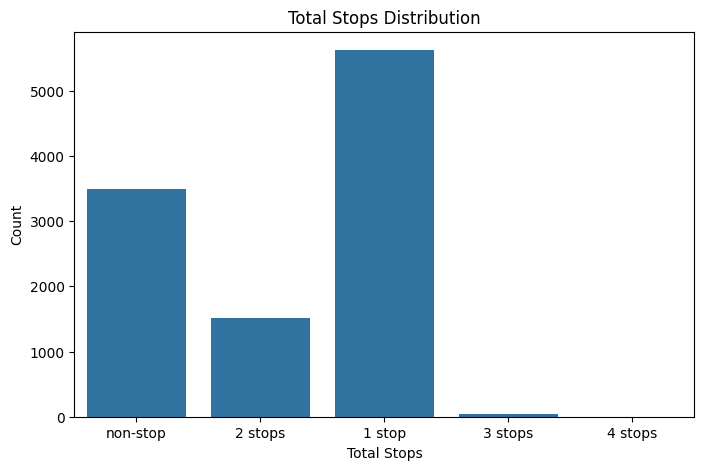

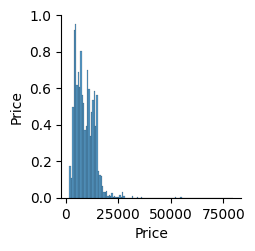

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_file_path = "Train.csv"
test_file_path = "Test.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Display basic statistics
display("Training Data Overview:")
display(train_df.describe(include='all'))

# Check for missing values
display("Missing Values:")
display(train_df.isnull().sum())

# Visualizing target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Price'], bins=50, kde=True)
plt.title('Distribution of Airfare Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Countplot of Airlines
plt.figure(figsize=(12, 6))
sns.countplot(y=train_df['Airline'], order=train_df['Airline'].value_counts().index)
plt.title("Airline Frequency Distribution")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

# Countplot of Total Stops
plt.figure(figsize=(8, 5))
sns.countplot(x=train_df['Total_Stops'])
plt.title("Total Stops Distribution")
plt.xlabel("Total Stops")
plt.ylabel("Count")
plt.show()

# Pairplot for numerical variables
sns.pairplot(train_df[['Price']])
plt.show()


Data Visualization:

- Distribution of Airfare Prices: A histogram with a KDE (Kernel Density Estimate) overlay shows the spread of airfare prices.
- Airline Frequency Distribution: A count plot shows how often each airline appears in the dataset.
- Total Stops Distribution: A count plot represents the frequency of different stop counts in flights.
- Pairplot for Numerical Variables: Helps visualize relationships and distributions in numerical columns.

# Outliers

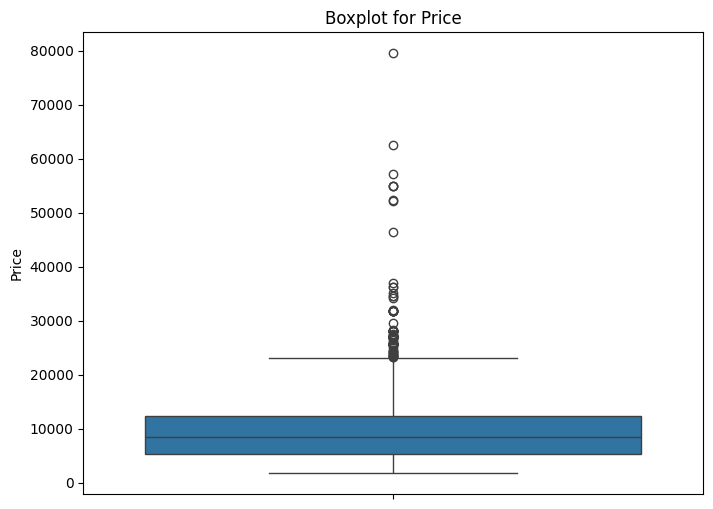

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

# Combine datasets to analyze both
combined_data = pd.concat([train_data, test_data], axis=0)

# Function to detect and visualize outliers using boxplot
def detect_outliers(data):
    # Create a boxplot for each numeric feature in the dataset
    numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
    for feature in numeric_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data[feature])
        plt.title(f'Boxplot for {feature}')
        plt.show()

# Call the function on combined data
detect_outliers(combined_data)


1. Boxplot for Price
- The boxplot visualizes the distribution of airfare prices.
- The blue box represents the Interquartile Range (IQR), which contains the middle 50% of the data (from Q1 to Q3).
- The whiskers extend to 1.5 times the IQR beyond Q1 and Q3, indicating the typical range of values.
- The black dots above the whiskers represent outliers—prices that are significantly higher than the majority.
- The presence of many outliers above 20,000 suggests that some flights have extremely high fares.

In [3]:
import numpy as np
import pandas as pd

# Load the dataset (Modify the filename as needed)
combined_data = pd.read_csv("Train.csv")  # Ensure the file is in the same directory

# Define the function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from "Price" column
combined_data_cleaned = remove_outliers_iqr(combined_data, "Price")

# Save the cleaned data to a CSV file
combined_data_cleaned.to_csv("cleaned_data.csv", index=False)

print("Outlier removal complete. Cleaned data saved as 'cleaned_data.csv'.")
print("Original data length:", len(combined_data))
print("Cleaned data length:", len(combined_data_cleaned))

Outlier removal complete. Cleaned data saved as 'cleaned_data.csv'.
Original data length: 10683
Cleaned data length: 10589


- Compute Q1 and Q3: The 25th percentile (Q1) and the 75th percentile (Q3) of the "Price" column.
- Calculate IQR: The interquartile range (IQR = Q3 - Q1).
- Determine Bounds:
- Lower Bound: Q1 - 1.5 * IQR (Minimum threshold)
- Upper Bound: Q3 + 1.5 * IQR (Maximum threshold)
- Filter Data: Retains only the data within the bounds, removing extreme values.
- The cleaned dataset (combined_data_cleaned) now contains only prices within a reasonable range, reducing the effect of extreme values on analysis.

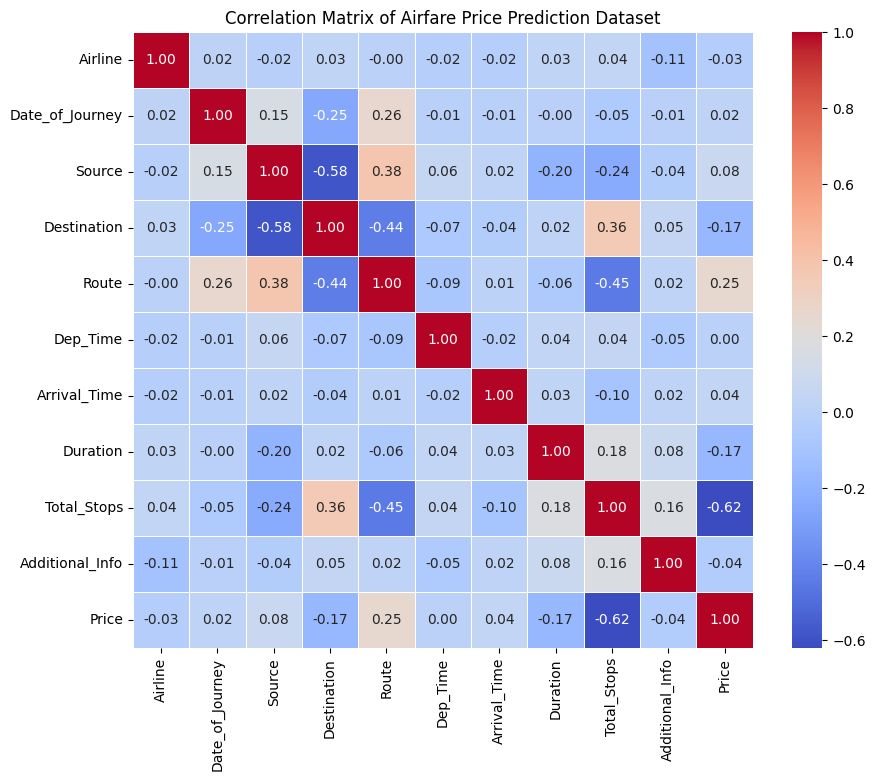

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_path = "cleaned_data.csv"
df = pd.read_csv(train_path)

# Convert categorical columns to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Airfare Price Prediction Dataset")
plt.show()


In [5]:
import pandas as pd
import numpy as np

# Load the dataset
train_file_path = "cleaned_data.csv"


train_df = pd.read_csv(train_file_path)


# Step 1: Convert Date_of_Journey into Day, Month, Year
train_df['Day'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.day
train_df['Month'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.month
train_df['Year'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.year
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

# Step 2: Extract Hour and Minute from Dep_Time and Arrival_Time
train_df['Dep_Hour'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Dep_Minute'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Dep_Time'], axis=1, inplace=True)

train_df['Arrival_Hour'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Arrival_Minute'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Arrival_Time'], axis=1, inplace=True)

# Step 3: Convert Duration into Duration_hours and Duration_minutes
def extract_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1].strip())
    return hours, minutes

train_df[['Duration_hours', 'Duration_minutes']] = train_df['Duration'].apply(lambda x: pd.Series(extract_duration(str(x))))
train_df.drop(['Duration'], axis=1, inplace=True)

# Step 4: Convert Total_Stops into an integer format
train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)

# Step 5: Convert categorical variables into numerical representations (One-Hot Encoding)
categorical_columns = ['Airline', 'Source', 'Destination']
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

# Step 6: Handle missing values
train_df.dropna(inplace=True)

# Display processed dataset
print(train_df.head())


                   Route  Total_Stops Additional_Info  Price  Day  Month  \
1  CCU ? IXR ? BBI ? BLR          2.0         No info   7662    1      5   
3        CCU ? NAG ? BLR          1.0         No info   6218   12      5   
4        BLR ? NAG ? DEL          1.0         No info  13302    1      3   
5              CCU ? BLR          0.0         No info   3873   24      6   
9        DEL ? BOM ? COK          1.0         No info   8625   27      5   

   Year  Dep_Hour  Dep_Minute  Arrival_Hour  ...  \
1  2019         5          50          13.0  ...   
3  2019        18           5          23.0  ...   
4  2019        16          50          21.0  ...   
5  2019         9           0          11.0  ...   
9  2019        11          25          19.0  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
1                            False           False         False   
3                            False           False         False   
4                         

C:\Users\ratho\AppData\Local\Temp\ipykernel_20976\520039626.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)


Shapiro-Wilk Test: W=0.9153667651406612, p-value=1.5268931431398705e-50
Kolmogorov-Smirnov Test: D=1.0, p-value=0.0
Anderson-Darling Test Statistic: 180.6436588221868
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]


c:\Users\ratho\Desktop\CONESTOGA\CSCN8010\ML_labs\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6305.
  res = hypotest_fun_out(*samples, **kwds)


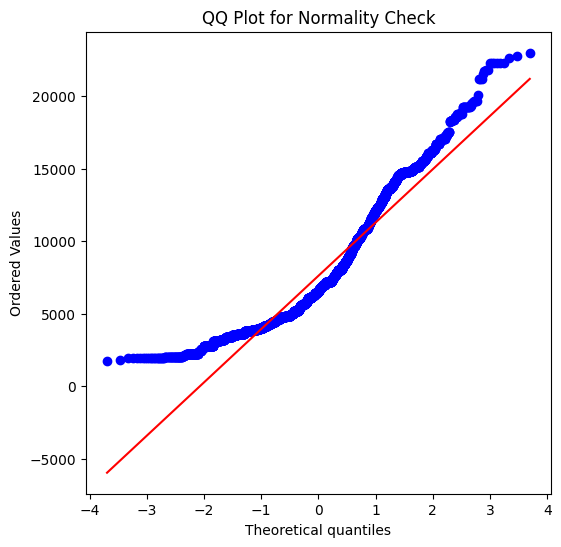

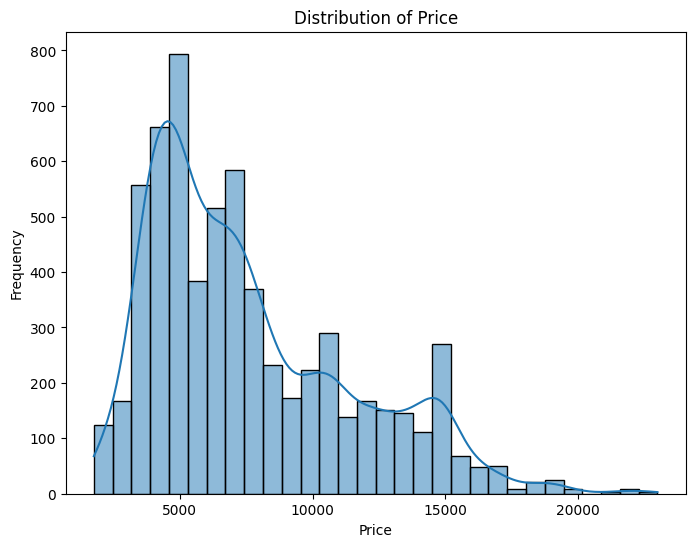

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical column to test (e.g., 'Price')
column_to_test = "Price"

# 1. Shapiro-Wilk Test (Best for small datasets)
shapiro_test = stats.shapiro(train_df[column_to_test])
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# 2. Kolmogorov-Smirnov Test (For large datasets)
ks_test = stats.kstest(train_df[column_to_test], 'norm')
print(f"Kolmogorov-Smirnov Test: D={ks_test.statistic}, p-value={ks_test.pvalue}")

# 3. Anderson-Darling Test
anderson_test = stats.anderson(train_df[column_to_test], dist='norm')
print(f"Anderson-Darling Test Statistic: {anderson_test.statistic}")
print("Critical values:", anderson_test.critical_values)
print("Significance levels:", anderson_test.significance_level)

# 4. QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(train_df[column_to_test], dist="norm", plot=plt)
plt.title("QQ Plot for Normality Check")
plt.show()

# 5. Histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(train_df[column_to_test], bins=30, kde=True)
plt.title(f"Distribution of {column_to_test}")
plt.xlabel(column_to_test)
plt.ylabel("Frequency")
plt.show()


In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
file_path = "cleaned_data.csv"  
data = pd.read_csv(file_path)

# Verify if the dataset is loaded
print(data.head())


# Step 1: Convert 'Total_Stops' to numeric values
stop_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
data['Total_Stops'] = data['Total_Stops'].map(stop_mapping).astype(float)

# Step 2: Extract Duration in Hours
def extract_duration_hours(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1].strip())
    return hours + minutes / 60  # Convert minutes to fraction of an hour

data['Duration_hours'] = data['Duration'].apply(lambda x: extract_duration_hours(str(x)))

# Step 3: Select two groups for T-Test (e.g., Flights from Two Airlines)
airlines = data['Airline'].unique()
if len(airlines) >= 2:
    airline_1, airline_2 = airlines[:2]  # Select first two airlines
    group1 = data[data['Airline'] == airline_1]['Price']
    group2 = data[data['Airline'] == airline_2]['Price']

    # Perform T-Test (Independent Samples)
    t_stat, t_pvalue = stats.ttest_ind(group1, group2, equal_var=False)
else:
    t_stat, t_pvalue = None, None

# Step 4: Perform F-Test (Levene's Test for Variance Comparison)
if len(airlines) >= 2:
    f_stat, f_pvalue = stats.levene(group1, group2)
else:
    f_stat, f_pvalue = None, None

# Step 5: Perform One-Way ANOVA (Comparing Price Across Multiple Airlines)
anova_model = ols("Price ~ C(Airline)", data=data).fit()
anova_results = sm.stats.anova_lm(anova_model, typ=2)

# Step 6: Perform Chi-Square Test (Checking Relationship Between Airline and Total Stops)
contingency_table = pd.crosstab(data["Airline"], data["Total_Stops"])
chi2_stat, chi2_pvalue, _, _ = stats.chi2_contingency(contingency_table)

# Step 7: Perform Mann-Whitney U Test (Non-Normal Distribution Alternative to T-Test)
if len(airlines) >= 2:
    mw_stat, mw_pvalue = stats.mannwhitneyu(group1, group2, alternative="two-sided")
else:
    mw_stat, mw_pvalue = None, None

# Step 8: Kruskal-Wallis Test (Non-Parametric Alternative to ANOVA)
kruskal_stat, kruskal_pvalue = stats.kruskal(*[data[data["Airline"] == g]["Price"] for g in airlines])

# Display results
results = {
    "T-Test": {"t-statistic": t_stat, "p-value": t_pvalue},
    "F-Test": {"F-statistic": f_stat, "p-value": f_pvalue},
    "One-Way ANOVA": anova_results,
    "Chi-Square Test": {"Chi2-statistic": chi2_stat, "p-value": chi2_pvalue},
    "Mann-Whitney U Test": {"U-statistic": mw_stat, "p-value": mw_pvalue},
    "Kruskal-Wallis Test": {"H-statistic": kruskal_stat, "p-value": kruskal_pvalue},
}

# Display results
results


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


{'T-Test': {'t-statistic': -38.218209839793076,
  'p-value': 3.1184316738037336e-258},
 'F-Test': {'F-statistic': 553.5030185074502,
  'p-value': 2.384000407151962e-114},
 'One-Way ANOVA':                   sum_sq       df           F  PR(>F)
 C(Airline)  7.205606e+10     10.0  738.164873     0.0
 Residual    1.032573e+11  10578.0         NaN     NaN,
 'Chi-Square Test': {'Chi2-statistic': 4776.150775553363, 'p-value': 0.0},
 'Mann-Whitney U Test': {'U-statistic': 646251.5,
  'p-value': 1.7665255389985942e-251},
 'Kruskal-Wallis Test': {'H-statistic': 4811.913530719691, 'p-value': 0.0}}

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "cleaned_data.csv"
data = pd.read_csv(file_path)

# Convert 'Total_Stops' to numeric format
stop_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
data['Total_Stops'] = data['Total_Stops'].map(stop_mapping).astype(float)

# Extract Duration in Hours
def extract_duration_hours(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1].strip())
    return hours + minutes / 60  # Convert minutes to fraction of an hour

data['Duration_hours'] = data['Duration'].apply(lambda x: extract_duration_hours(str(x)))

# Drop unnecessary columns
data.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info'], inplace=True)

# One-hot encode categorical variables (Airline, Source, Destination)
categorical_columns = ['Airline', 'Source', 'Destination']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display preprocessed data
print(data.head())


   Total_Stops  Price  Duration_hours  Airline_Air India  Airline_GoAir  \
0          0.0   3897        2.833333              False          False   
1          2.0   7662        7.416667               True          False   
2          2.0  13882       19.000000              False          False   
3          1.0   6218        5.416667              False          False   
4          1.0  13302        4.750000              False          False   

   Airline_IndiGo  Airline_Jet Airways  Airline_Multiple carriers  \
0            True                False                      False   
1           False                False                      False   
2           False                 True                      False   
3            True                False                      False   
4            True                False                      False   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  ...  \
0                                      False             False 

In [9]:
# Define features (X) and target variable (y)
X = data.drop(columns=['Price'])  # Independent variables
y = data['Price']  # Target variable

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shapes
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (8471, 21)
Testing Set Shape: (2118, 21)


In [10]:
# Fill missing values with zero
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:", lr_model.coef_)
print("Model Intercept:", lr_model.intercept_)


Model Coefficients: [ 2.55377153e+03  1.24826745e+01  1.67222667e+03  2.17778970e+02
  3.73659835e+02  4.19624222e+03  3.45435996e+03  4.44763866e+03
 -2.67224818e+02 -7.27595761e-12  2.34355859e+03  3.68059553e+03
 -3.35806595e+01  6.44695987e+01  1.68124079e+02 -8.04714653e+02
  6.44695987e+01 -9.66440349e+02 -8.04714653e+02 -3.35806595e+01
  1.57214198e+03]
Model Intercept: 4351.478506414705


In [11]:
# Predict prices using the test set
y_pred = lr_model.predict(X_test)

# Display first 5 actual vs predicted values
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison_df.head())


      Actual     Predicted
9592    9564   8717.228619
4710   14300  14138.918985
500     8372   8784.432623
4450    8529  11560.878742
5559    6442   7526.434476


Mean Absolute Error (MAE): 1844.683819422703
Mean Squared Error (MSE): 6148732.936564011
Root Mean Squared Error (RMSE): 2479.6638757226774
R-Squared (R²): 0.6193417710246516


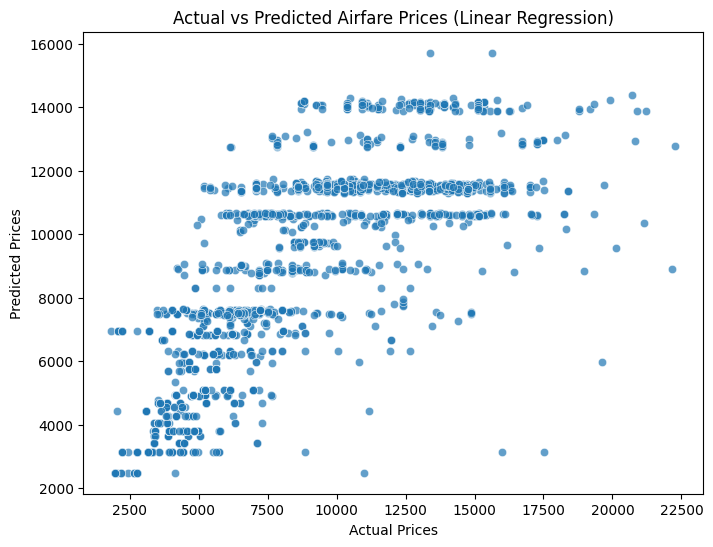

In [12]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print model performance
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Airfare Prices (Linear Regression)")
plt.show()


In [13]:
! pip install xgboost



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Load the dataset
train_file_path = "Train.csv"
test_file_path = "Test.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Step 1: Convert Date_of_Journey into Day, Month, Year
train_df['Day'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.day
train_df['Month'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.month
train_df['Year'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.year
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

# Step 2: Extract Hour and Minute from Dep_Time and Arrival_Time
train_df['Dep_Hour'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Dep_Minute'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Dep_Time'], axis=1, inplace=True)

train_df['Arrival_Hour'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Arrival_Minute'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Arrival_Time'], axis=1, inplace=True)

# Step 3: Convert Duration into Duration_hours and Duration_minutes
def extract_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1].strip())
    return hours, minutes

train_df[['Duration_hours', 'Duration_minutes']] = train_df['Duration'].apply(lambda x: pd.Series(extract_duration(str(x))))
train_df.drop(['Duration'], axis=1, inplace=True)

# Step 4: Convert Total_Stops into an integer format
train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)

# Step 5: Convert categorical variables into numerical representations (One-Hot Encoding)
categorical_columns = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

# Step 6: Handle missing values
train_df.dropna(inplace=True)

# Step 7: Apply Log Transformation to Price to Reduce Skewness
train_df['Price'] = np.log1p(train_df['Price'])

# Step 8: Standardizing the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df.drop(columns=['Price']))

# Step 9: Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, train_df['Price'], test_size=0.2, random_state=42)

# Step 10: Implement Polynomial Regression for Feature Engineering
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 11: Train Linear Regression with Polynomial Features
linear_model = make_pipeline(StandardScaler(), LinearRegression())
linear_model.fit(X_train_poly, y_train)

# Step 12: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 13: Train XGBoost Model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 14: Evaluate Model Performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-Squared (R2): {r2}")
    print("-" * 50)

# Evaluate all models
evaluate_model(linear_model, X_test_poly, y_test, "Polynomial Linear Regression")
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

C:\Users\ratho\AppData\Local\Temp\ipykernel_20976\853051662.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)


Polynomial Linear Regression Model Performance:
Mean Absolute Error (MAE): 1589818180403.9128
Mean Squared Error (MSE): 6.953252279039133e+26
Root Mean Squared Error (RMSE): 26369020230260.99
R-Squared (R2): -2.8429866009106527e+27
--------------------------------------------------
Random Forest Model Performance:
Mean Absolute Error (MAE): 0.06965397699825308
Mean Squared Error (MSE): 0.014187956882440917
Root Mean Squared Error (RMSE): 0.11911321036073588
R-Squared (R2): 0.9419894896771218
--------------------------------------------------
XGBoost Model Performance:
Mean Absolute Error (MAE): 0.08192096791038471
Mean Squared Error (MSE): 0.014241348128216069
Root Mean Squared Error (RMSE): 0.11933711965778321
R-Squared (R2): 0.9417711880964323
--------------------------------------------------


C:\Users\ratho\AppData\Local\Temp\ipykernel_20976\3469969146.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)


Random Forest Model Performance:
Confusion Matrix:
[[602  51]
 [ 35 582]]
Precision: 0.919431279620853
F1 Score: 0.9312
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       653
           1       0.92      0.94      0.93       617

    accuracy                           0.93      1270
   macro avg       0.93      0.93      0.93      1270
weighted avg       0.93      0.93      0.93      1270

--------------------------------------------------


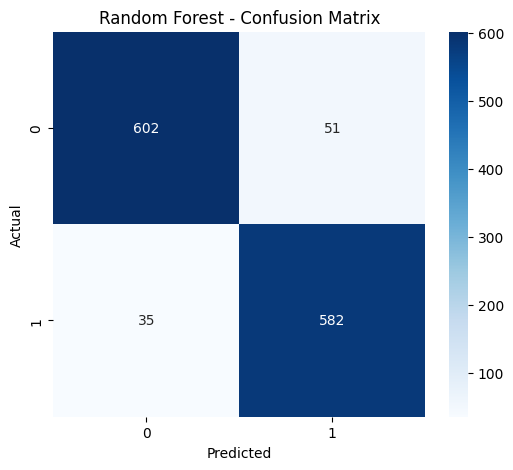

XGBoost Model Performance:
Confusion Matrix:
[[616  37]
 [ 28 589]]
Precision: 0.9408945686900958
F1 Score: 0.9477071600965407
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       653
           1       0.94      0.95      0.95       617

    accuracy                           0.95      1270
   macro avg       0.95      0.95      0.95      1270
weighted avg       0.95      0.95      0.95      1270

--------------------------------------------------


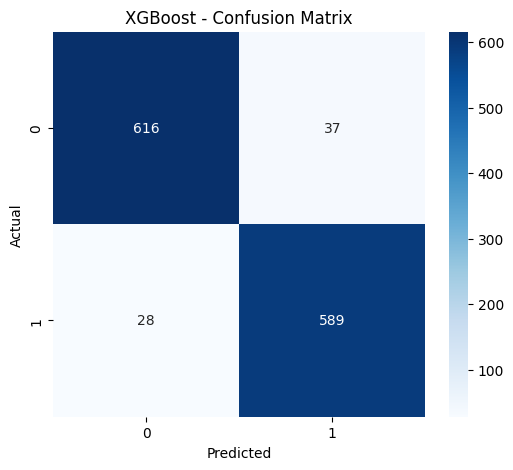

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score

# Load the dataset
train_file_path = "Train.csv"
test_file_path = "Test.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Step 1: Convert Date_of_Journey into Day, Month, Year
train_df['Day'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.day
train_df['Month'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.month
train_df['Year'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce').dt.year
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

# Step 2: Extract Hour and Minute from Dep_Time and Arrival_Time
train_df['Dep_Hour'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Dep_Minute'] = pd.to_datetime(train_df['Dep_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Dep_Time'], axis=1, inplace=True)

train_df['Arrival_Hour'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.hour
train_df['Arrival_Minute'] = pd.to_datetime(train_df['Arrival_Time'], format='%H:%M', errors='coerce').dt.minute
train_df.drop(['Arrival_Time'], axis=1, inplace=True)

# Step 3: Convert Duration into Duration_hours and Duration_minutes
def extract_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1].strip())
    return hours, minutes

train_df[['Duration_hours', 'Duration_minutes']] = train_df['Duration'].apply(lambda x: pd.Series(extract_duration(str(x))))
train_df.drop(['Duration'], axis=1, inplace=True)

# Step 4: Convert Total_Stops into an integer format
train_df['Total_Stops'] = train_df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(float)

# Step 5: Convert categorical variables into numerical representations (One-Hot Encoding)
categorical_columns = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

# Step 6: Handle missing values
train_df.dropna(inplace=True)

# Step 7: Standardizing the dataset
scaler = StandardScaler()
X = scaler.fit_transform(train_df.drop(columns=['Price']))
y = (train_df['Price'] > train_df['Price'].median()).astype(int)  # Convert Price into a classification problem

# Step 8: Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

# Step 10: Train XGBoost Classifier
xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=200, max_depth=10, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 11: Evaluate Model Performance
def evaluate_classification_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{model_name} Model Performance:")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print("Classification Report:")
    print(report)
    print("-" * 50)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

# Evaluate the models
evaluate_classification_model(rf_model, X_test, y_test, "Random Forest")
evaluate_classification_model(xgb_model, X_test, y_test, "XGBoost")


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Using past price data for time-series forecasting
price_series = train_df[['Price']]

# Fit ARIMA model
model = ARIMA(price_series, order=(5,1,0))
model_fit = model.fit()

# Make Predictions
forecast = model_fit.forecast(steps=10)
print("Future Airfare Predictions:", forecast)


c:\Users\ratho\Desktop\CONESTOGA\CSCN8010\ML_labs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\ratho\Desktop\CONESTOGA\CSCN8010\ML_labs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\ratho\Desktop\CONESTOGA\CSCN8010\ML_labs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Future Airfare Predictions: 6348    7549.140007
6349    8083.024793
6350    8467.272763
6351    9216.002905
6352    9584.685679
6353    9117.008380
6354    8722.359831
6355    8870.919663
6356    8977.132788
6357    9071.880726
Name: predicted_mean, dtype: float64


c:\Users\ratho\Desktop\CONESTOGA\CSCN8010\ML_labs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ratho\Desktop\CONESTOGA\CSCN8010\ML_labs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
def dynamic_pricing(predicted_price, demand_factor):
    """
    Adjust price based on demand factor.
    """
    return predicted_price * (1 + demand_factor)

# Example demand factor: 10% increase during peak season
demand_factor = 0.10
adjusted_price = dynamic_pricing(y_pred, demand_factor)
print("Adjusted Prices:", adjusted_price[:10])


Adjusted Prices: [ 9588.95148051 15552.81088321  9662.8758851  12716.96661658
  8279.07792331 12738.70727472 11697.59843983 11647.25165255
 11512.43109281  8379.45699824]


In [18]:
!pip install flask



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from flask import Flask, request, jsonify
import pickle

# Load the trained model
with open("price_model.pkl", "rb") as f:
    model = pickle.load(f)

# Create Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict_price():
    data = request.get_json()
    features = [data['Airline'], data['Total_Stops'], data['Dep_Hour']]
    prediction = model.predict([features])
    return jsonify({"Predicted Price": prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)  # Prevents SystemExit issue in Jupyter
